In [ ]:
#Import matplotlib.pyplot as plt and seaborn as sns 
import matplotlib.pyplot as plt
import seaborn as sns

#Import pandas as pd
import pandas as pd
url = 'https://github.com/WalePhenomenon/climate_change/blob/master/fuel_ferc1.csv?raw=true'
fuel_data = pd.read_csv(url)
fuel_data.head()





In [8]:
#Get the summary statistics
fuel_data.describe(include = 'all')

,record_id,utility_id_ferc1,report_year,plant_name_ferc1,fuel_type_code_pudl,fuel_unit,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
count,29523,29523.000000,29523.000000,29523,29523,29343,2.952300e+04,29523.000000,29523.000000,2.952300e+04,29523.000000
unique,29523,NaN,NaN,2315,6,9,NaN,NaN,NaN,NaN,NaN
top,f1_fuel_1994_12_1_0_7,NaN,NaN,big stone,gas,mcf,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,156,11486,11354,NaN,NaN,NaN,NaN,NaN
mean,NaN,118.601836,2005.806050,NaN,NaN,NaN,2.622119e+06,8.492111,208.649031,9.175704e+02,19.304354
std,NaN,74.178353,7.025483,NaN,NaN,NaN,9.118004e+06,10.600220,2854.490090,6.877593e+04,2091.540939
min,NaN,1.000000,1994.000000,NaN,NaN,NaN,1.000000e+00,0.000001,-276.080000,-8.749370e+02,-41.501000
25%,NaN,55.000000,2000.000000,NaN,NaN,NaN,1.381700e+04,1.024000,5.207000,3.778500e+00,1.940000
50%,NaN,122.000000,2006.000000,NaN,NaN,NaN,2.533220e+05,5.762694,26.000000,1.737100e+01,4.127000
75%,NaN,176.000000,2012.000000,NaN,NaN,NaN,1.424034e+06,17.006000,47.113000,4.213700e+01,7.745000


In [10]:
#Check for missing value
fuel_data.isnull().sum()

record_id                         0
utility_id_ferc1                  0
report_year                       0
plant_name_ferc1                  0
fuel_type_code_pudl               0
fuel_unit                       180
fuel_qty_burned                   0
fuel_mmbtu_per_unit               0
fuel_cost_per_unit_burned         0
fuel_cost_per_unit_delivered      0
fuel_cost_per_mmbtu               0
dtype: int64

In [11]:
#Use groupby to count the sum of each unique value in the fuelunit column
fuel_data.groupby("fuel_unit")["fuel_unit"].count()

fuel_unit
bbl        7998
gal          84
gramsU      464
kgU         110
mcf       11354
mmbtu       180
mwdth        95
mwhth       100
ton        8958
Name: fuel_unit, dtype: int64

In [12]:
#fill NaNs
fuel_data[["fuel_unit"]] = fuel_data[["fuel_unit"]].fillna(value="mcf")
#Check if missing value have been filled
fuel_data.isnull().sum()

record_id                       0
utility_id_ferc1                0
report_year                     0
plant_name_ferc1                0
fuel_type_code_pudl             0
fuel_unit                       0
fuel_qty_burned                 0
fuel_mmbtu_per_unit             0
fuel_cost_per_unit_burned       0
fuel_cost_per_unit_delivered    0
fuel_cost_per_mmbtu             0
dtype: int64

In [13]:
#Groupby fuel_type_code_pudl and print the first entries in all the groups formed
fuel_data.groupby("fuel_type_code_pudl").first()

,record_id,utility_id_ferc1,report_year,plant_name_ferc1,fuel_unit,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
fuel_type_code_pudl,,,,,,,,,,
coal,f1_fuel_1994_12_1_0_7,1,1994,rockport,ton,5377489.0,16.590000,18.590,18.530,1.121
gas,f1_fuel_1994_12_2_0_10,2,1994,chickasaw,mcf,40533.0,1.000000,2.770,2.770,2.570
nuclear,f1_fuel_1994_12_2_1_1,2,1994,joseph m. farley,kgU,2260.0,0.064094,28.770,0.000,0.450
oil,f1_fuel_1994_12_6_0_2,6,1994,clinch river,bbl,6510.0,5.875338,32.130,23.444,5.469
other,f1_fuel_1994_12_11_0_6,11,1994,w.f. wyman,bbl,55652.0,0.149719,14.685,15.090,2.335
waste,f1_fuel_1994_12_9_0_3,9,1994,b.l. england,ton,2438.0,0.015939,34.180,34.180,1.072


In [16]:
#Spliting fuel_data into new groups 
fuel_df1 = fuel_data.iloc[0:1900].reset_index(drop=True)
print(fuel_df1)
fuel_df2 = fuel_data.iloc[1900:].reset_index(drop=True)
print(fuel_df2)

                   record_id  utility_id_ferc1  report_year  \
0      f1_fuel_1994_12_1_0_7                 1         1994   
1     f1_fuel_1994_12_1_0_10                 1         1994   
2      f1_fuel_1994_12_2_0_1                 2         1994   
3      f1_fuel_1994_12_2_0_7                 2         1994   
4     f1_fuel_1994_12_2_0_10                 2         1994   
...                      ...               ...          ...   
1895  f1_fuel_1995_12_39_0_3                39         1995   
1896  f1_fuel_1995_12_39_0_6                39         1995   
1897  f1_fuel_1995_12_39_2_1                39         1995   
1898  f1_fuel_1995_12_39_2_4                39         1995   
1899  f1_fuel_1995_12_39_2_7                39         1995   

          plant_name_ferc1 fuel_type_code_pudl fuel_unit  fuel_qty_burned  \
0                 rockport                coal       ton        5377489.0   
1     rockport total plant                coal       ton       10486945.0   
2           

In [19]:
#Check that the length of both dataframes sums to the expected length
assert len(fuel_data) == len(fuel_df1)+len(fuel_df2)

In [22]:
#An inner merge will lose rows that do not match in both dataframe
fuel_data_mg = pd.merge(fuel_df1,fuel_df2, how = "inner")
print(fuel_data_mg)

Empty DataFrame
Columns: [record_id, utility_id_ferc1, report_year, plant_name_ferc1, fuel_type_code_pudl, fuel_unit, fuel_qty_burned, fuel_mmbtu_per_unit, fuel_cost_per_unit_burned, fuel_cost_per_unit_delivered, fuel_cost_per_mmbtu]
Index: []


In [23]:
#An outer merge returns all rows in both dataframe
pd.merge(fuel_df1,fuel_df2, how = "outer")

,record_id,utility_id_ferc1,report_year,plant_name_ferc1,fuel_type_code_pudl,fuel_unit,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
0,f1_fuel_1994_12_1_0_7,1,1994,rockport,coal,ton,5377489.0,16.590,18.59,18.53,1.121
1,f1_fuel_1994_12_1_0_10,1,1994,rockport total plant,coal,ton,10486945.0,16.592,18.58,18.53,1.120
2,f1_fuel_1994_12_2_0_1,2,1994,gorgas,coal,ton,2978683.0,24.130,39.72,38.12,1.650
3,f1_fuel_1994_12_2_0_7,2,1994,barry,coal,ton,3739484.0,23.950,47.21,45.99,1.970
4,f1_fuel_1994_12_2_0_10,2,1994,chickasaw,gas,mcf,40533.0,1.000,2.77,2.77,2.570
...,...,...,...,...,...,...,...,...,...,...,...
29518,f1_fuel_2018_12_12_0_13,12,2018,neil simpson ct #1,gas,mcf,18799.0,1.059,4.78,4.78,9.030
29519,f1_fuel_2018_12_12_1_1,12,2018,cheyenne prairie 58%,gas,mcf,806730.0,1.050,3.65,3.65,6.950
29520,f1_fuel_2018_12_12_1_10,12,2018,lange ct facility,gas,mcf,104554.0,1.060,4.77,4.77,8.990
29521,f1_fuel_2018_12_12_1_13,12,2018,wygen 3 bhp 52%,coal,ton,315945.0,16.108,3.06,14.76,1.110


In [24]:
# Remove rows from the right dataframe that do not have a match with the left and keep all rows from the left
pd.merge(fuel_df1,fuel_df2, how = "left")

,record_id,utility_id_ferc1,report_year,plant_name_ferc1,fuel_type_code_pudl,fuel_unit,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
0,f1_fuel_1994_12_1_0_7,1,1994,rockport,coal,ton,5377489.0,16.590000,18.590,18.530,1.121
1,f1_fuel_1994_12_1_0_10,1,1994,rockport total plant,coal,ton,10486945.0,16.592000,18.580,18.530,1.120
2,f1_fuel_1994_12_2_0_1,2,1994,gorgas,coal,ton,2978683.0,24.130000,39.720,38.120,1.650
3,f1_fuel_1994_12_2_0_7,2,1994,barry,coal,ton,3739484.0,23.950000,47.210,45.990,1.970
4,f1_fuel_1994_12_2_0_10,2,1994,chickasaw,gas,mcf,40533.0,1.000000,2.770,2.770,2.570
...,...,...,...,...,...,...,...,...,...,...,...
1895,f1_fuel_1995_12_39_0_3,39,1995,montville,gas,mcf,1733652.0,1.030000,2.511,2.474,2.438
1896,f1_fuel_1995_12_39_0_6,39,1995,devon,gas,mcf,13468921.0,1.010000,1.969,1.969,1.955
1897,f1_fuel_1995_12_39_2_1,39,1995,milstone no. 1 & 2,nuclear,gramsU,504938.0,0.000006,0.000,0.000,0.000
1898,f1_fuel_1995_12_39_2_4,39,1995,millstone no. 3,nuclear,gramsU,713219.0,0.000006,0.000,0.000,0.000


In [25]:
#Check for duplicate row
fuel_data.duplicated().any()

False

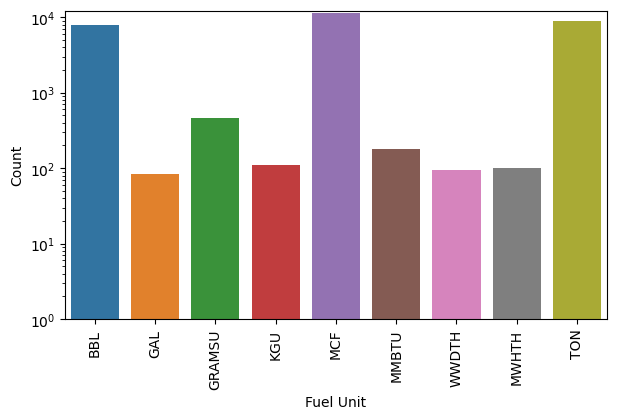

In [26]:
plt.figure(figsize=(7,4))
plt.xticks(rotation = 90)
fuel_unit = pd.DataFrame({'unit':['BBL','GAL', 'GRAMSU', 'KGU', 'MCF', 'MMBTU', 'WWDTH', 'MWHTH','TON'], 'count':[
    7998, 84, 464, 110, 11354, 180, 95, 100, 8958]})
g = sns.barplot(data=fuel_unit, x ='unit', y = 'count')
g.set_yscale('log')
g.set_ylim(1, 12000)
plt.xlabel('Fuel Unit')
plt.ylabel('Count')
plt.show()